In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [2]:
d=pd.read_csv("\capstone_project\XYZCorp_LendingData.txt",sep="\t")#creating a dataframe

c:\users\tyagi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#this code is used to display all the rows and coulmns
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(d.head(5))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_st

In [4]:
# we are creating dummies before splitting the data into train and test but we are not going to delete the
#coloumns because we are going to use them for analysis.we will delete them before model building
dummy1=pd.get_dummies(d["home_ownership"],drop_first=True,prefix="home_ownership")
dummy2=pd.get_dummies(d["verification_status"],drop_first=True,prefix="verification_status")
dummy3=pd.get_dummies(d["initial_list_status"],drop_first=True,prefix="initial_list_status")

In [5]:
d= pd.concat([d,dummy1],axis=1)
d= pd.concat([d,dummy2],axis=1)
d= pd.concat([d,dummy3],axis=1)

In [6]:
d.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [7]:
d["issue_d"] = pd.to_datetime(d["issue_d"])
d = d.set_index(d["issue_d"])
d = d.sort_index()

In [8]:
#train = d['2007-06-01':'2015-05-31']
#test  = d['2015-06-01':]
#print(train.shape)
#print(test.shape)

In [9]:
d = d.set_index(d["issue_d"])
d = d.sort_index()
train_d = d.copy()['2007-06-01':'2015-05-31']
test_d  = d.copy()['2015-06-01':]
print(train_d.shape)
print(test_d.shape)

(598978, 81)
(256991, 81)


In [10]:
train_d.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_12m,default_ind,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,87023,86999,7500.0,7500.0,800.0,36 months,13.75,255.43,E,E2,...,NaN,0,0,0,0,1,0,0,0,0
2007-07-01,90966,90962,5000.0,5000.0,4150.0,36 months,7.43,155.38,A,A2,...,NaN,0,1,0,0,0,0,0,0,0
2007-07-01,99009,98991,5750.0,5750.0,3675.0,36 months,7.43,178.69,A,A2,...,NaN,0,1,0,0,0,0,0,0,0
2007-07-01,112245,112227,5000.0,5000.0,3975.0,36 months,7.43,155.38,A,A2,...,NaN,0,0,0,0,0,1,0,0,0
2007-07-01,109355,109346,1200.0,1200.0,0.0,36 months,11.54,39.60,C,C5,...,NaN,0,0,0,0,0,1,0,0,0


In [11]:
#train_d.drop(columns=['issue_d'],inplace=True)
#test_d.drop(columns=['issue_d'],inplace=True)

In [12]:
train_d=train_d.reset_index(drop=True)
test_d=test_d.reset_index(drop=True)

In [13]:
print(train_d.id.isna().sum())
print(train_d.member_id.isna().sum())
print(train_d.id.nunique())
print(train_d.member_id.nunique())

0
0
598978
598978


In [14]:
# as we can observe from the above code that id and member_id are two diffrent unique ids which dose not make any sense
#to keep two unique id's so we will drop one and keep other
train_d.drop("id",axis=1,inplace=True)
test_d.drop("id",axis=1,inplace=True)

In [15]:
print(train_d.shape)
print(test_d.shape)

(598978, 80)
(256991, 80)


In [16]:
#this code is used to display all the rows and coulmns
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(train_d.dtypes)

member_id                                       int64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                datetime64[ns]
pymnt_plan                                     object
desc                                           object
purpose                                        object
title                       

In [17]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(train_d.isna().sum())

member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               34465
emp_length                              28105
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
pymnt_plan                                  0
desc                                   477177
purpose                                     0
title                                      18
zip_code                                    0
addr_state                                  0
dti                               

In [18]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(test_d.isna().sum())

member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
funded_amnt_inv                             0
term                                        0
int_rate                                    0
installment                                 0
grade                                       0
sub_grade                                   0
emp_title                               14978
emp_length                              14956
home_ownership                              0
annual_inc                                  0
verification_status                         0
issue_d                                     0
pymnt_plan                                  0
desc                                   256980
purpose                                     0
title                                      15
zip_code                                    0
addr_state                                  0
dti                               

# droping variables with more than 90% missing values

In [19]:
# these are 15 varibles which we have droped on the basis of high missing values
d.drop(["desc","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il" ,"total_bal_il" ,"il_util" ,"open_rv_12m" ,                   
"open_rv_24m","max_bal_bc","all_util" ,"inq_fi" ,"total_cu_tl" ,"inq_last_12m","annual_inc_joint","dti_joint","verification_status_joint" ],axis=1,inplace=True)

In [20]:
# these are 15 varibles which we have droped on the basis of high missing values
train_d.drop(["desc","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il" ,"total_bal_il" ,"il_util" ,"open_rv_12m" ,                   
"open_rv_24m","max_bal_bc","all_util" ,"inq_fi" ,"total_cu_tl" ,"inq_last_12m","annual_inc_joint","dti_joint","verification_status_joint" ],axis=1,inplace=True)

In [21]:
# these are 15 varibles which we have droped on the basis of high missing values
test_d.drop(["desc","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il" ,"total_bal_il" ,"il_util" ,"open_rv_12m" ,                   
"open_rv_24m","max_bal_bc","all_util" ,"inq_fi" ,"total_cu_tl" ,"inq_last_12m","annual_inc_joint","dti_joint","verification_status_joint" ],axis=1,inplace=True)

In [22]:
d.isna().sum()

id                                     0
member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
                                      ..
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_w                  0
Length: 63, dtype: int64

In [23]:
train_d.isna().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
                                      ..
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_w                  0
Length: 62, dtype: int64

In [24]:
test_d.isna().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
                                      ..
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_w                  0
Length: 62, dtype: int64

In [25]:
print(d["title"].isna().sum())
print(train_d["title"].isna().sum())
print(test_d["title"].isna().sum())

33
18
15


##we are replacing the missing values of the variables with zero 

In [26]:
m=["emp_title","emp_length","title","mths_since_last_delinq","mths_since_last_record","revol_util","last_pymnt_d","next_pymnt_d",
  "mths_since_last_major_derog","tot_coll_amt","tot_cur_bal","total_rev_hi_lim","last_credit_pull_d","collections_12_mths_ex_med"  ] 
    
for i in m:
    d[i] = d[i].replace(np.nan, 0)
    train_d[i] = train_d[i].replace(np.nan, 0)
    test_d[i] = test_d[i].replace(np.nan, 0)
    

In [27]:
d.isna().sum()

id                                     0
member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
                                      ..
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_w                  0
Length: 63, dtype: int64

In [28]:
train_d.isna().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
                                      ..
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_w                  0
Length: 62, dtype: int64

In [29]:
test_d.isna().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
                                      ..
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_w                  0
Length: 62, dtype: int64

In [30]:
print(d.shape)
print(train_d.shape)
print(test_d.shape)

(855969, 63)
(598978, 62)
(256991, 62)


## checking for singularity

In [31]:
# checking for singularity

for i in train_d:
    freq=train_d[i].value_counts()
    print(freq)
    print("----------------------------------------------------------")

12589059    1
5397790     1
2968828     1
53302527    1
11707649    1
           ..
679393      1
45037913    1
1723875     1
31096293    1
26216447    1
Name: member_id, Length: 598978, dtype: int64
----------------------------------------------------------
10000.0    42134
12000.0    33354
15000.0    31067
20000.0    30498
35000.0    22846
           ...  
725.0          1
29925.0        1
750.0          1
30425.0        1
33475.0        1
Name: loan_amnt, Length: 1358, dtype: int64
----------------------------------------------------------
10000.0    42041
12000.0    33263
15000.0    30955
20000.0    30317
35000.0    22708
           ...  
29925.0        1
34075.0        1
31225.0        1
800.0          1
34425.0        1
Name: funded_amnt, Length: 1360, dtype: int64
----------------------------------------------------------
10000.000000    37624
12000.000000    29367
15000.000000    26796
20000.000000    25494
35000.000000    18907
                ...  
9589.667231         1
14206

0.00      2940
53.00     1144
58.00     1140
59.00     1102
61.00     1101
          ... 
88.48        1
122.10       1
129.40       1
70.94        1
5.79         1
Name: revol_util, Length: 1291, dtype: int64
----------------------------------------------------------
22.0     21858
20.0     21826
21.0     21783
23.0     21292
19.0     21288
         ...  
106.0        1
150.0        1
121.0        1
119.0        1
108.0        1
Name: total_acc, Length: 118, dtype: int64
----------------------------------------------------------
f    361847
w    237131
Name: initial_list_status, dtype: int64
----------------------------------------------------------
0.00        244733
7977.02        146
7953.10        119
7716.61        119
11965.54       114
             ...  
5746.65          1
10935.91         1
11633.41         1
3673.37          1
738.50           1
Name: out_prncp, Length: 171880, dtype: int64
----------------------------------------------------------
0.00        244733
7977.02 

In [32]:
# so here we have variable which show singularity we will see their relation ship with output variable
sing=["pymnt_plan","pub_rec","total_rec_late_fee","recoveries","collection_recovery_fee","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq"]

In [33]:
for s in sing:
    print(train_d[s].value_counts())

n    598973
y         5
Name: pymnt_plan, dtype: int64
0.0     513890
1.0      72171
2.0       8610
3.0       2522
4.0        858
5.0        453
6.0        212
7.0        106
8.0         56
9.0         28
10.0        25
11.0        11
12.0         8
13.0         6
15.0         4
18.0         3
21.0         2
49.0         2
17.0         2
16.0         2
19.0         1
14.0         1
40.0         1
22.0         1
63.0         1
54.0         1
34.0         1
Name: pub_rec, dtype: int64
0.000000     589426
15.000000      2081
30.000000       244
45.000000        28
16.370000        14
              ...  
44.958197         1
14.995936         1
15.985576         1
29.948245         1
20.290000         1
Name: total_rec_late_fee, Length: 5309, dtype: int64
0.00       574792
200.00         10
14.28           9
11.70           9
16.50           8
            ...  
2022.81         1
3292.69         1
1060.39         1
5376.80         1
62.28           1
Name: recoveries, Length: 22626, dtype: i

<AxesSubplot:xlabel='default_ind', ylabel='count'>

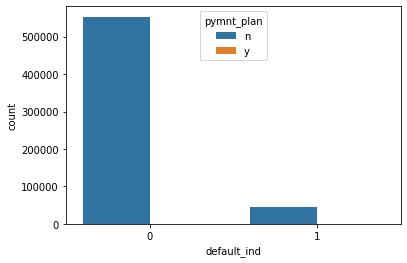

In [34]:
sns.countplot(x=train_d["default_ind"], hue =train_d['pymnt_plan'])

<AxesSubplot:xlabel='default_ind', ylabel='count'>

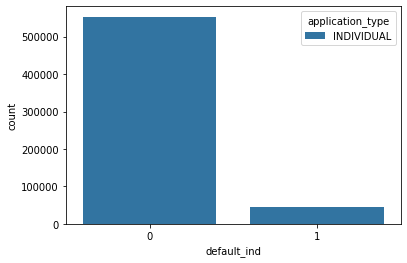

In [35]:
sns.countplot(x=train_d["default_ind"], hue =train_d["application_type"])

<AxesSubplot:xlabel='default_ind', ylabel='count'>

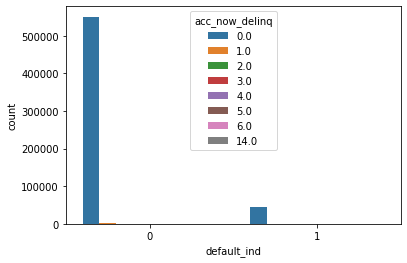

In [36]:
sns.countplot(x=train_d["default_ind"], hue =train_d["acc_now_delinq"])

<AxesSubplot:xlabel='default_ind', ylabel='count'>

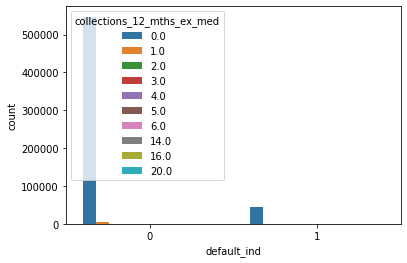

In [37]:
sns.countplot(x=train_d["default_ind"], hue =train_d["collections_12_mths_ex_med"])

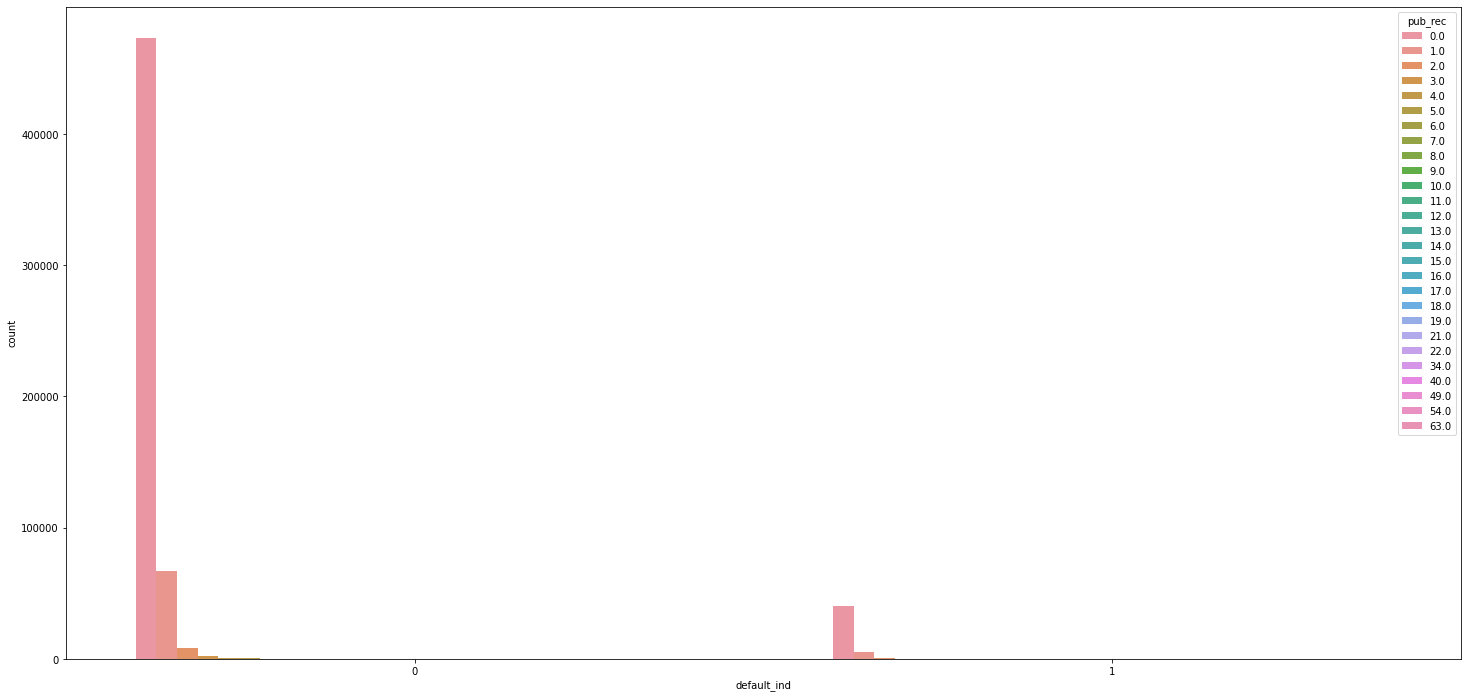

In [38]:
plt.figure(figsize=(25,12))
sns.countplot(x=train_d["default_ind"], hue =train_d["pub_rec"])
plt.show()

as we can see from the above count plots that the variables(pymnt_plan,pub_rec collections_12_mths_ex_med,policy_code,application_type and acc_now_delinq)    
dosent make any major impact on output classes 0 and 1 


and these variables also show singularity 
so we are are going delet them



In [39]:
d.drop(["pymnt_plan","pub_rec","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq"],axis=1,inplace=True)
train_d.drop(["pymnt_plan","pub_rec","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq"],axis=1,inplace=True)
test_d.drop(["pymnt_plan","pub_rec","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq"],axis=1,inplace=True)

In [40]:
# sub setting data set on the basis of output varible classes
a=train_d[train_d.default_ind   == 1]
b=train_d[train_d.default_ind   == 0]
print(a.shape)
print(b.shape)

(46156, 56)
(552822, 56)


In [41]:
(b["collection_recovery_fee"]==0).value_counts()

True    552822
Name: collection_recovery_fee, dtype: int64

In [42]:
(a["collection_recovery_fee"]==0).value_counts()

True     23121
False    23035
Name: collection_recovery_fee, dtype: int64

as we know zero is a mode of collection_recovery_fee 
and from the above result we can observe that the observation which have value =0 are all belong to 
non-defaulters
and all other values are distrubuted among the defaulters
so it seems that collection_recovery_fee have impact on output variable and its singularity is because of unbalanced dataset

In [43]:
(b["recoveries"]==0).value_counts()

True    552822
Name: recoveries, dtype: int64

In [44]:
(a["recoveries"]==0).value_counts()

False    24186
True     21970
Name: recoveries, dtype: int64

as we know zero is a mode of recoveries and from the above result we can observe that the observation which have value =0 are all belong to non-defaulters and all other values are distrubuted among the defaulters so it seems that recoveries have impact on output variable and its singularity is because of unbalanced dataset

In [45]:
(b["total_rec_late_fee"]==0).value_counts()

True     547199
False      5623
Name: total_rec_late_fee, dtype: int64

In [46]:
(a["total_rec_late_fee"]==0).value_counts()

True     42227
False     3929
Name: total_rec_late_fee, dtype: int64

as we can observe from the above result 99% of observation in non defaulters has value zero 
and 0.7 to other value 

91% of observation in defaulters has value zero 
and other 8% to other value

so we are going to keep total_rec_late_fee,recoveries and collection_recovery_fee

# seprating the numeric and categorical  variables 

In [47]:
#have stored the numerical feature in num variable
num = train_d.select_dtypes(include=["int64","float64"])
print(num.shape)

(598978, 31)


In [48]:
# we have stored the categorical feature in cat variable 
cat = train_d.select_dtypes(include=["object"])
print(cat.shape)

(598978, 16)


# EDA on categorical variables

In [49]:
cat.dtypes

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
purpose                object
title                  object
zip_code               object
addr_state             object
earliest_cr_line       object
initial_list_status    object
last_pymnt_d           object
next_pymnt_d           object
last_credit_pull_d     object
dtype: object

In [50]:
for col in cat:

    freq=train_d[col].value_counts()
    print(freq)
    print("----------------------------------------------------------")

 36 months    427239
 60 months    171739
Name: term, dtype: int64
----------------------------------------------------------
B    173419
C    163121
A    100727
D     96354
E     45902
F     15689
G      3766
Name: grade, dtype: int64
----------------------------------------------------------
B3    39269
B4    38735
C1    35306
C2    34923
B2    33329
C3    33020
B5    32735
C4    31765
A5    30307
B1    29351
C5    28107
A4    25170
D1    24542
D2    20997
D3    18547
D4    17638
A3    16473
A2    15089
D5    14630
A1    13688
E1    11870
E2    11074
E3     9055
E4     7586
E5     6317
F1     4762
F2     3571
F3     3118
F4     2431
F5     1807
G1     1307
G2      956
G3      673
G4      451
G5      379
Name: sub_grade, dtype: int64
----------------------------------------------------------
0                                           34465
Teacher                                      7971
Manager                                      6629
Registered Nurse                             3

In [51]:
ct=["term","grade","sub_grade","emp_length","home_ownership","verification_status","purpose","initial_list_status","next_pymnt_d","addr_state"]

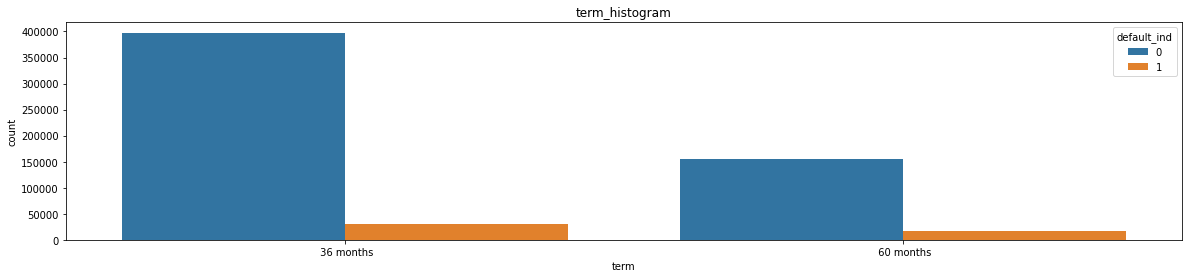

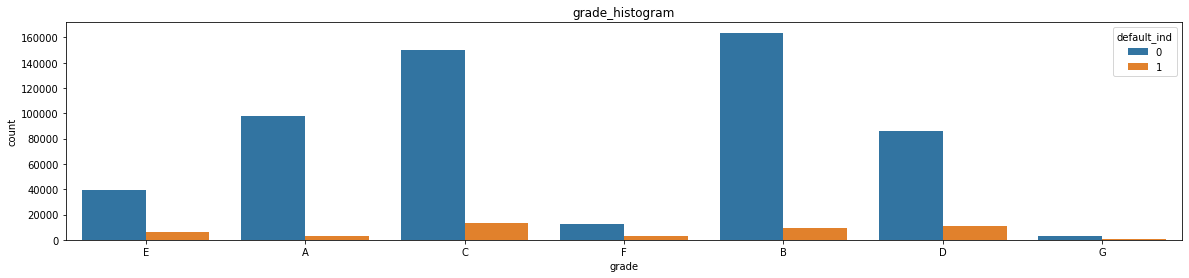

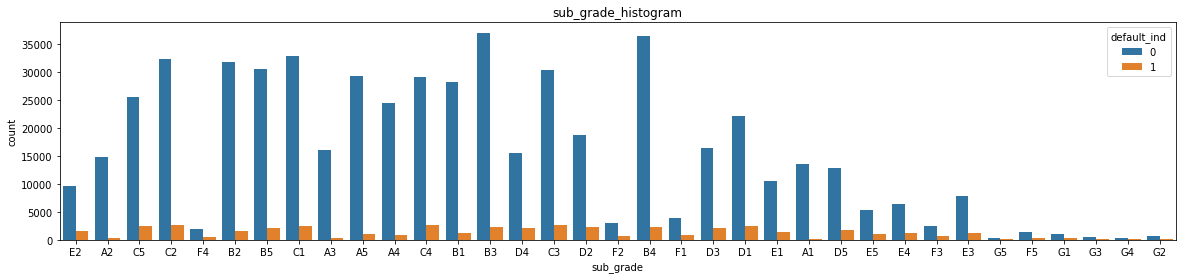

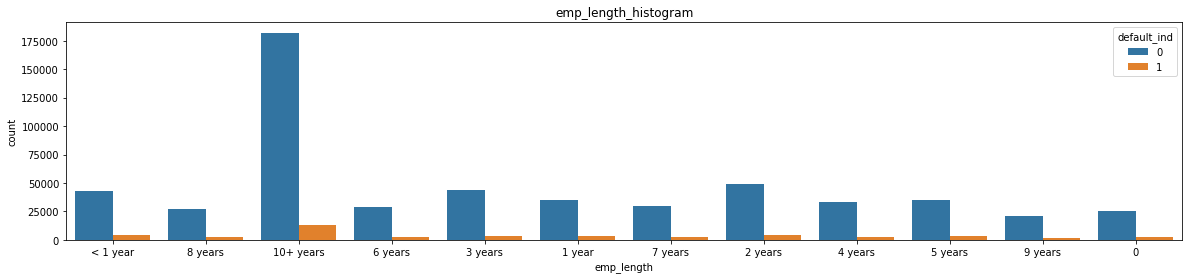

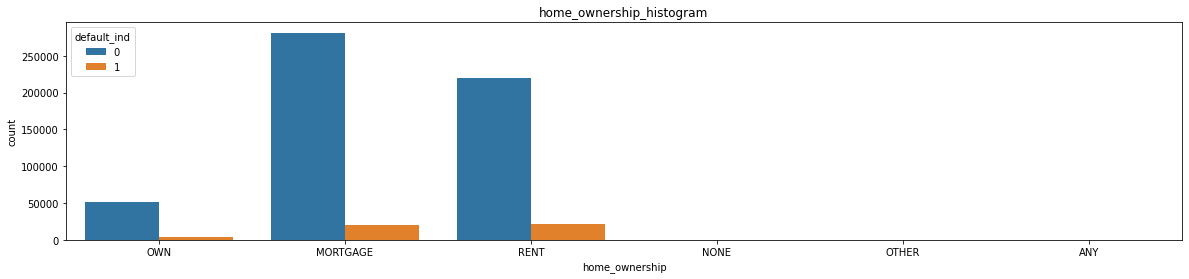

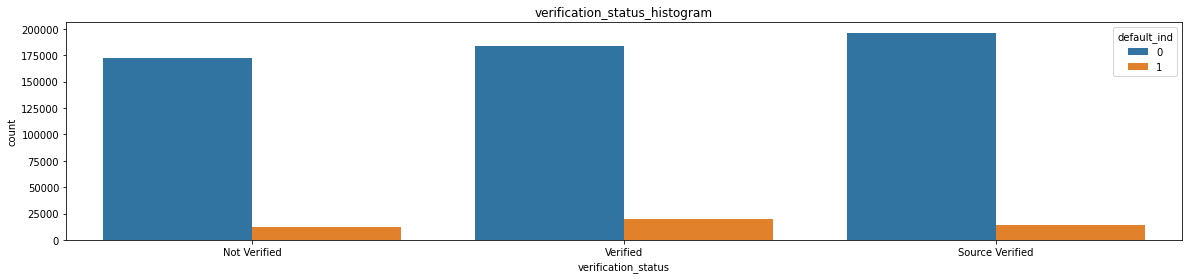

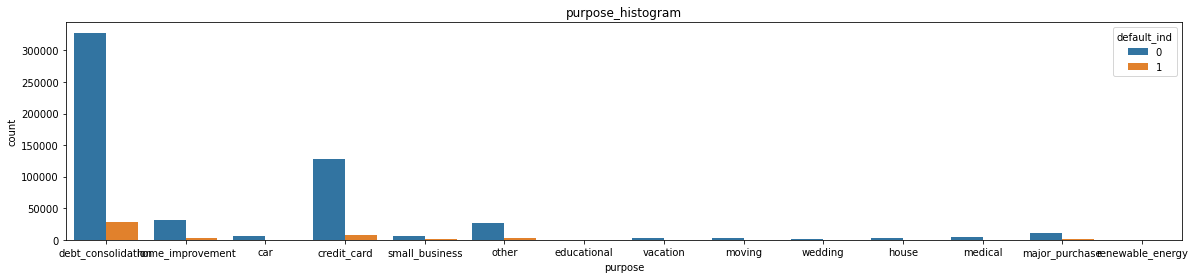

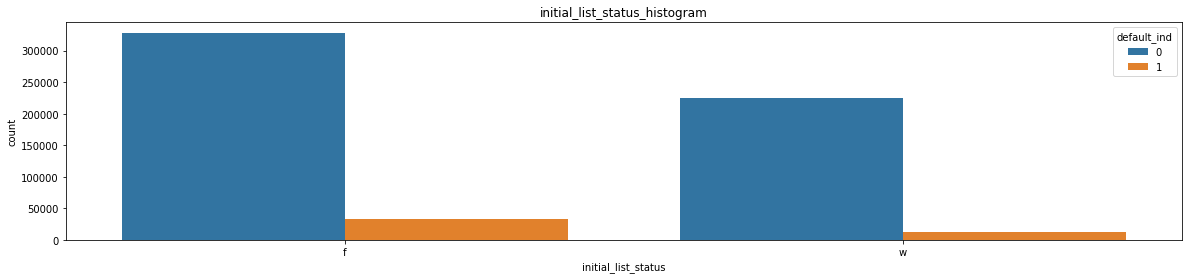

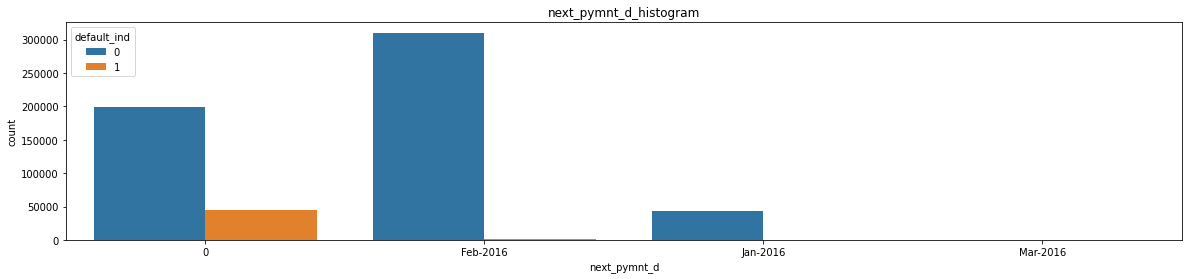

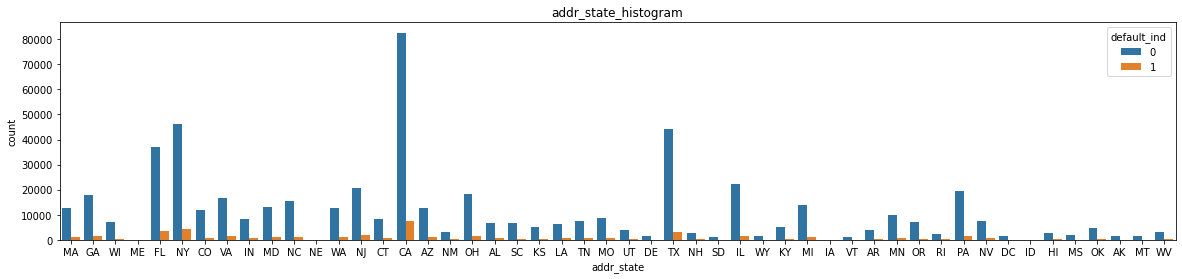

In [52]:
for c in ct:
    plt.figure(figsize=(20,4))
    
    sns.countplot(data = train_d, x = c,hue="default_ind")
    plt.title(c+"_histogram")
    
    plt.show()

as we can observe from the above plots that these variables dose not provide any 
major information for deciding wether the customer is defaulter or not

# analysing the rest of the categorical variables

In [53]:
a.shape

(46156, 56)

In [54]:
for j in cat:
    print("___________________total__________________________")
    print((train_d[j].value_counts()/598978)*100)
    print("*******************************************************************")
    print("____________non_defaulters____________________")
    print((b[j].value_counts()/552822)*100)
    print("************************************************************************************************")
    print("_______________defaulters______________________")
    print((a[j].value_counts()/46156)*100)
    print("**************************************************************************************************")

___________________total__________________________
 36 months    71.327995
 60 months    28.672005
Name: term, dtype: float64
*******************************************************************
____________non_defaulters____________________
 36 months    71.928035
 60 months    28.071965
Name: term, dtype: float64
************************************************************************************************
_______________defaulters______________________
 36 months    64.141173
 60 months    35.858827
Name: term, dtype: float64
**************************************************************************************************
___________________total__________________________
B    28.952482
C    27.233221
A    16.816477
D    16.086401
E     7.663387
F     2.619295
G     0.628738
Name: grade, dtype: float64
*******************************************************************
____________non_defaulters____________________
B    29.620565
C    27.168058
A    17.741334
D    15.491062
E     

Debt consolidation                    41.545098
Credit card refinancing               15.829797
Home improvement                       3.754228
Other                                  3.105957
Debt Consolidation                     2.582566
                                        ...    
Loan for Moving                        0.000167
down payment for a home                0.000167
crdtcard                               0.000167
0% Balance transfer expiring soon!     0.000167
loancombine                            0.000167
Name: title, Length: 60991, dtype: float64
*******************************************************************
____________non_defaulters____________________
Debt consolidation                 42.486370
Credit card refinancing            16.453036
Home improvement                    3.872132
Other                               3.127227
Debt Consolidation                  2.457934
                                     ...    
Citi Payoff Loan                    0.000181

Feb-2016    51.998905
0           40.850749
Jan-2016     7.145671
Mar-2016     0.004675
Name: next_pymnt_d, dtype: float64
*******************************************************************
____________non_defaulters____________________
Feb-2016    56.142122
0           36.121573
Jan-2016     7.731241
Mar-2016     0.005065
Name: next_pymnt_d, dtype: float64
************************************************************************************************
_______________defaulters______________________
0           97.493284
Feb-2016     2.374556
Jan-2016     0.132160
Name: next_pymnt_d, dtype: float64
**************************************************************************************************
___________________total__________________________
Jan-2016    75.347175
Dec-2015     2.798934
Nov-2015     1.653149
Sep-2015     1.545633
Oct-2015     1.542795
              ...    
Jul-2007     0.000167
May-2008     0.000167
Jul-2008     0.000167
Jun-2008     0.000167
May-2007     0.000167
N

we are calculating here the percentage of sub_categories of varibles among defaulters and non defaulters 
and on the basis of that we are observing the significance of the variable


emp_tittle - in this variable defaulters have 7% of missing value and
             non-defaulters have 5% of missing value and rest of the data in this variable is evenly distributed 
             among both defaulters and non-defaulters
             so this varible dose not provide any information in deciding wether the customer is defaulter or not
             
             
             non-defaulters
             0                                           5.673118
             Teacher                                     1.560466
             Manager                                     1.287458
             Registered Nurse                            0.640147
             Owner                                       0.622234
             
             defaulters
             0                                           7.573116
             Manager                                     0.858674
             Teacher                                     0.716638
             Supervisor                                  0.380915
             manager                                     0.370155
             
             
             
term-   it seems that term dose not provide any useful info


        non-defaulters
        36 months    71.465916
        60 months    28.534084
        
        defaulters
        36 months    64.12723
        60 months    35.87277
        
        
purpose- dose not provide any useful info



         non-defaulters
         debt_consolidation    59.925488
         credit_card           23.728786
         home_improvement       5.885100
         other                  4.687820
         
         defaulters
         debt_consolidation    61.094971
         credit_card           17.343491
         other                  6.458347
         home_improvement       4.984182
         
         
zip_code- dose not provide any useful info 
         
earliest_cr_line- dose not provide any useful info 


issue_d - so the data suggest that the issue_d varies among the defaulters and non-defaulters
          12% of defaulters we see have a issue date of 2014
          
          
          
title - as we can observe from the data 71% of application belong to



        Debt consolidation                      46.507409
        Credit card refinancing                 16.602076
        Home improvement                         3.513364
        Other                                    3.565783
        Debt Consolidation                       2.807192
        
        but when we see the data of defaulters we can observe that the proportion is different
        Debt consolidation                        30.468935
        Credit card refinancing                    8.414574
        Debt Consolidation                         4.048034
        Other                                      2.879463
        Home improvement                           2.367271
        
last_pymnt_date- the distribution of sub-categories is differnt among defaulters and non defaulters



                        non-defaulters
                        Jan-2016    57.749209
                        Dec-2015    17.624169
                        Oct-2015     1.504876
                        Jul-2015     1.400244
                        Sep-2015     1.308829
                        
                        defaulters
                        Jul-2015    6.751028
                        Aug-2015    6.342135
                        Jun-2015    5.644866
                        May-2015    5.091786
                        Apr-2015    4.723782

                        
                        
home-ownership- dosent have any major diffrence among defaulters and non-defaulters
                  
    
                  non-defaulters
                  MORTGAGE    50.491537
                  RENT        39.606202
                  OWN          9.882743
                  
                  defaulters
                  RENT        47.177567
                  MORTGAGE    43.850475
                  OWN          8.898788
                  
                  
verification status- dosent have any major diffrence among defaulters and non-defaulters
                     
    
                     non-defaulters
                     Source Verified    37.550988
                     Verified           32.151866
                     Not Verified       30.297146
                     
                     defaulters
                     Verified           42.565692
                     Source Verified    30.563626
                     Not Verified       26.870682
initial_list_status- in non defaulters both the sub-categories are equally distributed but in defaulter 
                     category f has 72% of data and w has 27% 
                     
        
        
                     non-defaulters
                     f    50.519208
                     w    49.480792
                     
                     defaulters
                     f    72.311533
                     w    27.688467
                
sub_grade-       
                
    
                non-defaulters
                B3    6.505358
                B4    6.390843
                C1    6.058169
                C2    5.910795
                B2    5.678800
                C3    5.646682
                B5    5.578244
                C4    5.473365
                A5    5.306102
                B1    5.282260
                C5    4.564164
                
                defaulters
                C4    5.668539
                C3    5.653475
                C2    5.614737
                C5    5.563088
                C1    5.481309
                D1    5.231670
                B4    5.126219
                D2    5.044440
                B3    4.943293
                B5    4.685045
                D4    4.637700
                D3    4.499968
                
addrs_state- dose not provide any major info
             
    
    
             non-defaulters
             CA    14.531033
             NY     8.262364
             TX     8.099053
             FL     6.796771
             IL     4.052986
             NJ     3.727106
             PA     3.539707
             OH     3.352555
             
             defaulters
             CA    16.233026
             NY     9.103235
             FL     7.788323
             TX     6.770396
             NJ     4.067403
             PA     3.434696
             IL     3.378742
             OH     3.253922
             VA     3.157079
             
emp_length- 

            non-defaulters
            10+ years    33.178670
            2 years       8.877927
            3 years       7.875706
            < 1 year      7.863477
            1 year        6.398502
            
            defaulters
            10+ years    29.070093
            2 years       8.864355
            < 1 year      8.483440
            3 years       7.829212
            5 years       7.058773

next_pymnt_date-


                  non-defaulters
                  Feb-2016    65.835168
                  0           25.660591
                  Jan-2016     8.496088
                  Mar-2016     0.008153
                  
                  defaulters
                  0           97.376633
                  Feb-2016     2.489939
                  Jan-2016     0.133428
           
last_credit_pull_date-  


                        non-defaulters
                        Jan-2016    84.080830
                        Dec-2015     1.893386
                        Nov-2015     1.398761
                        Oct-2015     1.261516
                        
                        defaulters
                        Jan-2016    45.303118
                        Dec-2015     7.988465
                        Mar-2015     2.509308
                        Jul-2015     2.489939
                        Jan-2015     2.436137
                       
conclusion---as we can observe from the above result 
             (emp_title,term,purpose,zip_code,earliest_cr_line,addr_state) dose not provide any useful information
             in deciding weather the customer is defaulter or not
             
             (verification_status,home_ownership,emp_length,title)provide a little amount of information
             
             
             (last_credit_pull_date,sub_grade,initial_list_status,last_pymnt_date,next_paymt_d)dose provide information
             

In [55]:
#deleting the variables which dose not provide any information
d.drop(["emp_title","purpose","zip_code","earliest_cr_line","addr_state"],axis=1,inplace=True)
train_d.drop(["emp_title","purpose","zip_code","earliest_cr_line","addr_state"],axis=1,inplace=True)
test_d.drop(["emp_title","purpose","zip_code","earliest_cr_line","addr_state"],axis=1,inplace=True)

# data wrangling

In [56]:
#converting emp_length into numeric
train_d['emp_length'] = np.where(train_d['emp_length']==0, "unknown", train_d['emp_length'])
train_d['emp_length'] = np.where(train_d['emp_length']=="< 1 year", "less_than_one", train_d['emp_length'])


train_d["emp_length"]=train_d["emp_length"].str.replace("years","")
train_d["emp_length"]=train_d["emp_length"].str.replace("year","")
train_d["emp_length"]=train_d["emp_length"].str.replace("+","")
train_d["emp_length"]=train_d["emp_length"].str.replace("less_than_one","0")
train_d["emp_length"]=train_d["emp_length"].str.replace("unknown","0")
train_d["emp_length"]=pd.to_numeric(train_d["emp_length"],errors="coerce")


#converting in test data too
test_d['emp_length'] = np.where(test_d['emp_length']==0, "unknown", test_d['emp_length'])
test_d['emp_length'] = np.where(test_d['emp_length']=="< 1 year", "less_than_one", test_d['emp_length'])


test_d["emp_length"]=test_d["emp_length"].str.replace("years","")
test_d["emp_length"]=test_d["emp_length"].str.replace("year","")
test_d["emp_length"]=test_d["emp_length"].str.replace("+","")
test_d["emp_length"]=test_d["emp_length"].str.replace("less_than_one","0")
test_d["emp_length"]=test_d["emp_length"].str.replace("unknown","0")
test_d["emp_length"]=pd.to_numeric(test_d["emp_length"],errors="coerce")


<ipython-input-56-c0df46fa4c30>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  train_d["emp_length"]=train_d["emp_length"].str.replace("+","")
<ipython-input-56-c0df46fa4c30>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  test_d["emp_length"]=test_d["emp_length"].str.replace("+","")


In [57]:
train_d["emp_length"]

0          0
1          8
2         10
3          6
4          0
          ..
598973     0
598974     8
598975     5
598976     5
598977    10
Name: emp_length, Length: 598978, dtype: int64

In [58]:
test_d["emp_length"]

0          1
1         10
2          2
3          3
4         10
          ..
256986     8
256987     0
256988     9
256989     2
256990     2
Name: emp_length, Length: 256991, dtype: int64

In [59]:
# Spliting emp_length and then Converting to numeric 
#train_d["emp_length"] = pd.to_numeric(train_d["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
# Spliting emp_length and then Converting to numeric 
#test_d["emp_length"] = pd.to_numeric(test_d["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

converting the date variables into datetime

In [60]:

train_d["last_pymnt_d"] = pd.to_datetime(train_d["last_pymnt_d"])
train_d["next_pymnt_d"] = pd.to_datetime(train_d["next_pymnt_d"])
train_d["last_credit_pull_d"] = pd.to_datetime(train_d["last_credit_pull_d"])



test_d["last_pymnt_d"] = pd.to_datetime(test_d["last_pymnt_d"])
test_d["next_pymnt_d"] = pd.to_datetime(test_d["next_pymnt_d"])
test_d["last_credit_pull_d"] = pd.to_datetime(test_d["last_credit_pull_d"])

In [61]:
test_d.dtypes

member_id                                       int64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_length                                      int64
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                datetime64[ns]
title                                          object
dti                                           float64
delinq_2yrs                                   float64
inq_last_6mths                                float64
mths_since_last_delinq      

In [62]:
train_d.dtypes

member_id                                       int64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_length                                      int64
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                datetime64[ns]
title                                          object
dti                                           float64
delinq_2yrs                                   float64
inq_last_6mths                                float64
mths_since_last_delinq      

In [63]:
#le=LabelEncoder()

In [64]:
#d["grade"]=le.fit_transform(d["grade"])
#d["sub_grade"]=le.fit_transform(d["sub_grade"])
#d["verification_status"]=le.fit_transform(d["verification_status"])
#d["home_ownership"]=le.fit_transform(d["home_ownership"])
#d["initial_list_status"]=le.fit_transform(d["initial_list_status"])

In [65]:
train_d['title'] = np.where(train_d['title']=='Debt consolidation', 1, train_d['title'])
train_d['title'] = np.where(train_d['title']=='Debt Consolidation', 1, train_d['title'])
train_d['title'] = np.where(train_d['title']=='Credit card refinancing', 2, train_d['title'])
train_d['title'] = np.where(train_d['title']=='Home improvement', 3, train_d['title'])
train_d['title'] = np.where(train_d['title']=='Other', 4, train_d['title'])
train_d['title'] = np.where(train_d['title']=='Major purchase', 5, train_d['title'])
train_d['title'] = np.where(train_d['title']==0,"0", train_d['title'])
train_d["title"]=pd.to_numeric(train_d["title"],errors="coerce")
train_d['title'] = np.where(train_d['title']>5, 0, train_d['title'])
train_d["title"] = train_d["title"].replace(np.nan, 0)







test_d['title'] = np.where(test_d['title']=='Debt consolidation', 1, test_d['title'])
test_d['title'] = np.where(test_d['title']=='Debt Consolidation', 1, test_d['title'])
test_d['title'] = np.where(test_d['title']=='Credit card refinancing', 2, test_d['title'])
test_d['title'] = np.where(test_d['title']=='Home improvement', 3, test_d['title'])
test_d['title'] = np.where(test_d['title']=='Other', 4, test_d['title'])
test_d['title'] = np.where(test_d['title']=='Major purchase', 5, test_d['title'])
test_d['title'] = np.where(test_d['title']==0,"0", test_d['title'])
test_d["title"]=pd.to_numeric(test_d["title"],errors="coerce")
test_d['title'] = np.where(test_d['title']>5, 0, test_d['title'])
test_d["title"] = test_d["title"].replace(np.nan, 0)



In [66]:
print(train_d["title"].value_counts())
print(test_d["title"].value_counts())

1.0    264317
0.0    191927
2.0     94818
3.0     22487
4.0     18604
5.0      6825
Name: title, dtype: int64
1.0    149243
2.0     64411
3.0     16146
4.0     11918
0.0     10578
5.0      4695
Name: title, dtype: int64


In [67]:
train_d["title"].isna().sum()

0

In [68]:
test_d["title"].isna().sum()

0

In [69]:
train_d.isna().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_length                             0
home_ownership                         0
annual_inc                             0
verification_status                    0
issue_d                                0
title                                  0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_sta

In [70]:
test_d.isna().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_length                             0
home_ownership                         0
annual_inc                             0
verification_status                    0
issue_d                                0
title                                  0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_sta

In [71]:
print(train_d.shape)

(598978, 51)


In [72]:
print(test_d.shape)

(256991, 51)


In [73]:
ct

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'next_pymnt_d',
 'addr_state']

In [74]:
unwanted ={'purpose','addr_state','next_pymnt_d'}
ct = [ele for ele in ct if ele not in unwanted] 

In [75]:
ct

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'initial_list_status']

In [76]:
for t in ct:
    print(train_d[t].head(10))

0     36 months
1     36 months
2     36 months
3     36 months
4     36 months
5     36 months
6     36 months
7     36 months
8     36 months
9     36 months
Name: term, dtype: object
0    E
1    A
2    A
3    A
4    C
5    C
6    F
7    B
8    B
9    A
Name: grade, dtype: object
0    E2
1    A2
2    A2
3    A2
4    C5
5    C2
6    F4
7    B2
8    B5
9    A2
Name: sub_grade, dtype: object
0     0
1     8
2    10
3     6
4     0
5     3
6     1
7     1
8     0
9     7
Name: emp_length, dtype: int64
0         OWN
1    MORTGAGE
2    MORTGAGE
3        RENT
4        RENT
5        RENT
6        RENT
7    MORTGAGE
8        RENT
9    MORTGAGE
Name: home_ownership, dtype: object
0    Not Verified
1    Not Verified
2    Not Verified
3    Not Verified
4    Not Verified
5    Not Verified
6    Not Verified
7    Not Verified
8    Not Verified
9    Not Verified
Name: verification_status, dtype: object
0    f
1    f
2    f
3    f
4    f
5    f
6    f
7    f
8    f
9    f
Name: initial_list_status, d

In [77]:
term_to_int = {' 36 months': 36, ' 60 months': 60}
# term

grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1))) 
#Grades
    
sub_grade_sorted=dict(zip(train_d["sub_grade"].value_counts().sort_index().index,np.arange(35, 0, -1)))  
#sub-Grade

In [78]:
train_d.replace({'term': term_to_int, 'grade':grade_to_int,'sub_grade': sub_grade_sorted}, inplace=True)

In [79]:
test_d.replace({'term': term_to_int, 'grade':grade_to_int,'sub_grade': sub_grade_sorted}, inplace=True)

In [80]:
# we have created a dummies before splitting the data into train and test now we will delet the oringnal columns
# from training and testing data sets seprately
train_d.drop(["home_ownership","verification_status","initial_list_status"],axis=1,inplace=True)
test_d.drop(["home_ownership","verification_status","initial_list_status"],axis=1,inplace=True)

In [81]:
train_d.shape

(598978, 48)

In [82]:
test_d.shape

(256991, 48)

In [83]:
train_d.dtypes

member_id                                       int64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                            int64
int_rate                                      float64
installment                                   float64
grade                                           int64
sub_grade                                       int64
emp_length                                      int64
annual_inc                                    float64
issue_d                                datetime64[ns]
title                                         float64
dti                                           float64
delinq_2yrs                                   float64
inq_last_6mths                                float64
mths_since_last_delinq                        float64
mths_since_last_record                        float64
open_acc                    

In [84]:
test_d.dtypes

member_id                                       int64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                            int64
int_rate                                      float64
installment                                   float64
grade                                           int64
sub_grade                                       int64
emp_length                                      int64
annual_inc                                    float64
issue_d                                datetime64[ns]
title                                         float64
dti                                           float64
delinq_2yrs                                   float64
inq_last_6mths                                float64
mths_since_last_delinq                        float64
mths_since_last_record                        float64
open_acc                    

# EDA of Numerical data

In [85]:
for n in num:

    freq=train_d[n].value_counts()
    print(freq)
    print("----------------------------------------------------------")

12589059    1
5397790     1
2968828     1
53302527    1
11707649    1
           ..
679393      1
45037913    1
1723875     1
31096293    1
26216447    1
Name: member_id, Length: 598978, dtype: int64
----------------------------------------------------------
10000.0    42134
12000.0    33354
15000.0    31067
20000.0    30498
35000.0    22846
           ...  
725.0          1
29925.0        1
750.0          1
30425.0        1
33475.0        1
Name: loan_amnt, Length: 1358, dtype: int64
----------------------------------------------------------
10000.0    42041
12000.0    33263
15000.0    30955
20000.0    30317
35000.0    22708
           ...  
29925.0        1
34075.0        1
31225.0        1
800.0          1
34425.0        1
Name: funded_amnt, Length: 1360, dtype: int64
----------------------------------------------------------
10000.000000    37624
12000.000000    29367
15000.000000    26796
20000.000000    25494
35000.000000    18907
                ...  
9589.667231         1
14206

0.0         67503
15000.0      1788
12000.0      1737
14500.0      1734
10000.0      1728
            ...  
34545.0         1
41040.0         1
101520.0        1
56931.0         1
466700.0        1
Name: total_rev_hi_lim, Length: 16327, dtype: int64
----------------------------------------------------------
0    552822
1     46156
Name: default_ind, dtype: int64
----------------------------------------------------------


# checking for Multicollinearity

In [86]:
# now we are going to create a new dataframe in which we will keep the variables for which..
# we will check multicollinearity

m=pd.DataFrame(m)
m=train_d.copy()

In [87]:
m.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'annual_inc', 'issue_d', 'title', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w'],
      dtype='object')

In [88]:
m.drop(["default_ind","home_ownership_MORTGAGE","home_ownership_NONE","home_ownership_OTHER","home_ownership_OWN",                              
          "home_ownership_RENT","verification_status_Source Verified","verification_status_Verified","initial_list_status_w","member_id",
         "next_pymnt_d","last_credit_pull_d","issue_d"],axis=1,inplace=True)

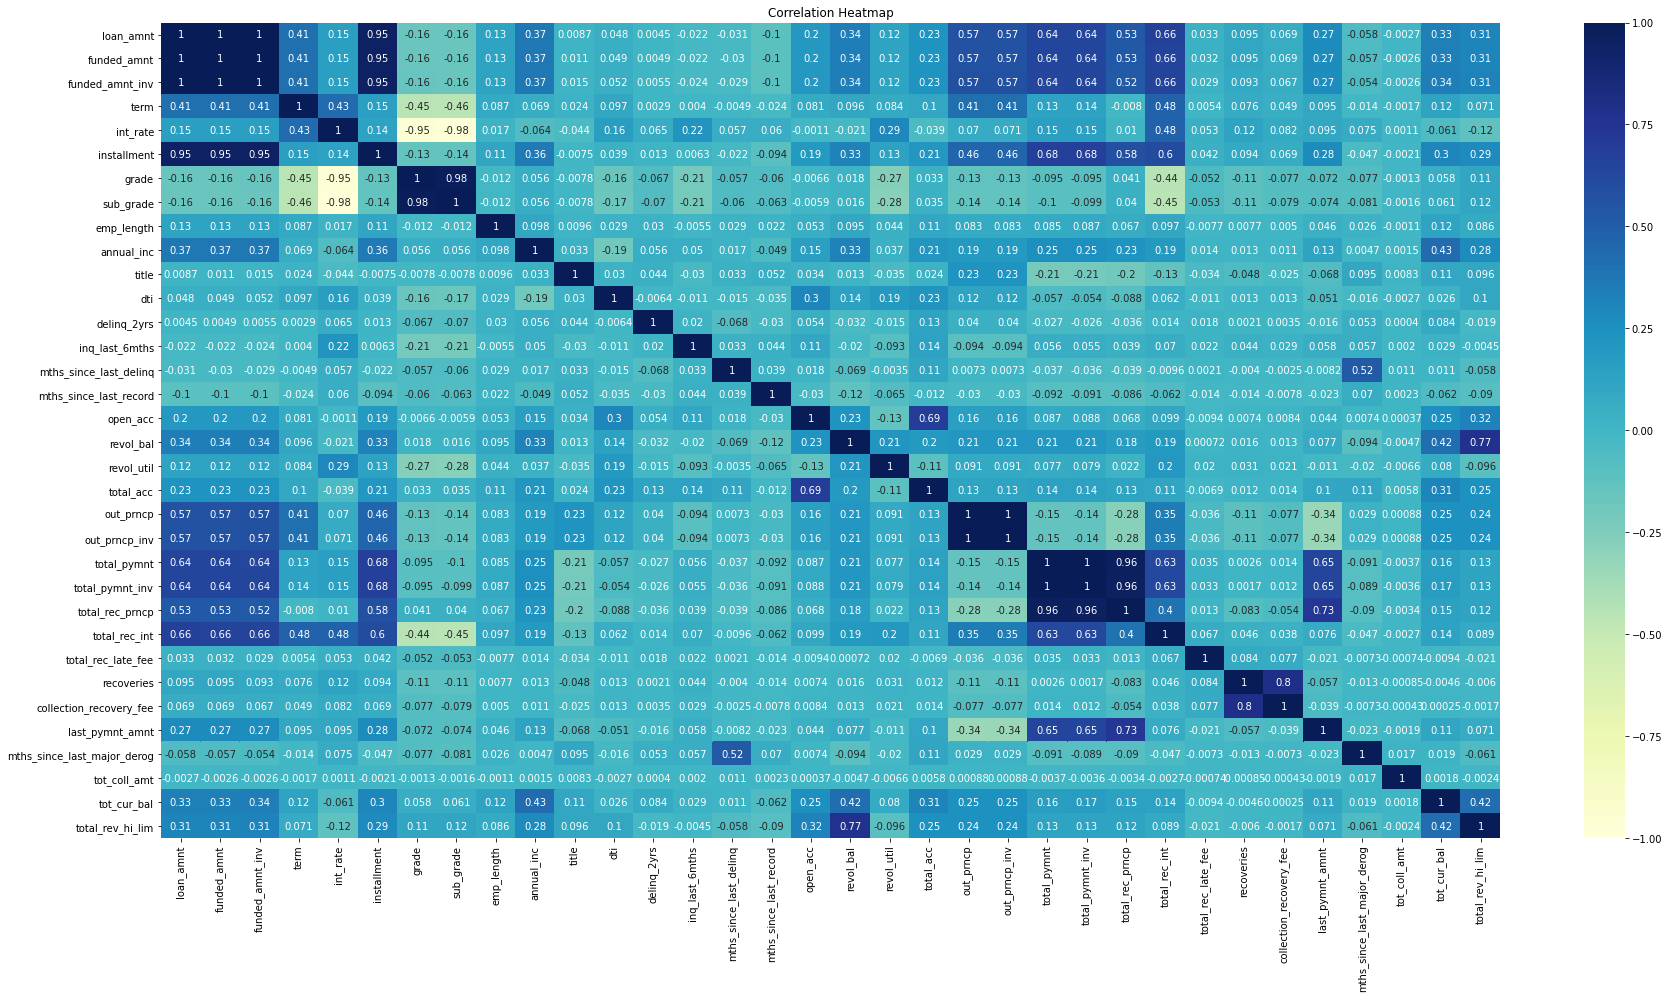

In [89]:
corr = m.corr()
mask = np.zeros_like(corr)
fit,ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
ax.set_ylim(len(corr), 0.0)
plt.title("Correlation Heatmap")
plt.show()

In [90]:
m.drop(["loan_amnt","funded_amnt_inv","installment","grade","sub_grade","out_prncp_inv","total_pymnt_inv","total_rec_prncp","last_pymnt_d"],axis=1,inplace=True)

In [91]:
m.columns

Index(['funded_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'title',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'mths_since_last_major_derog', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

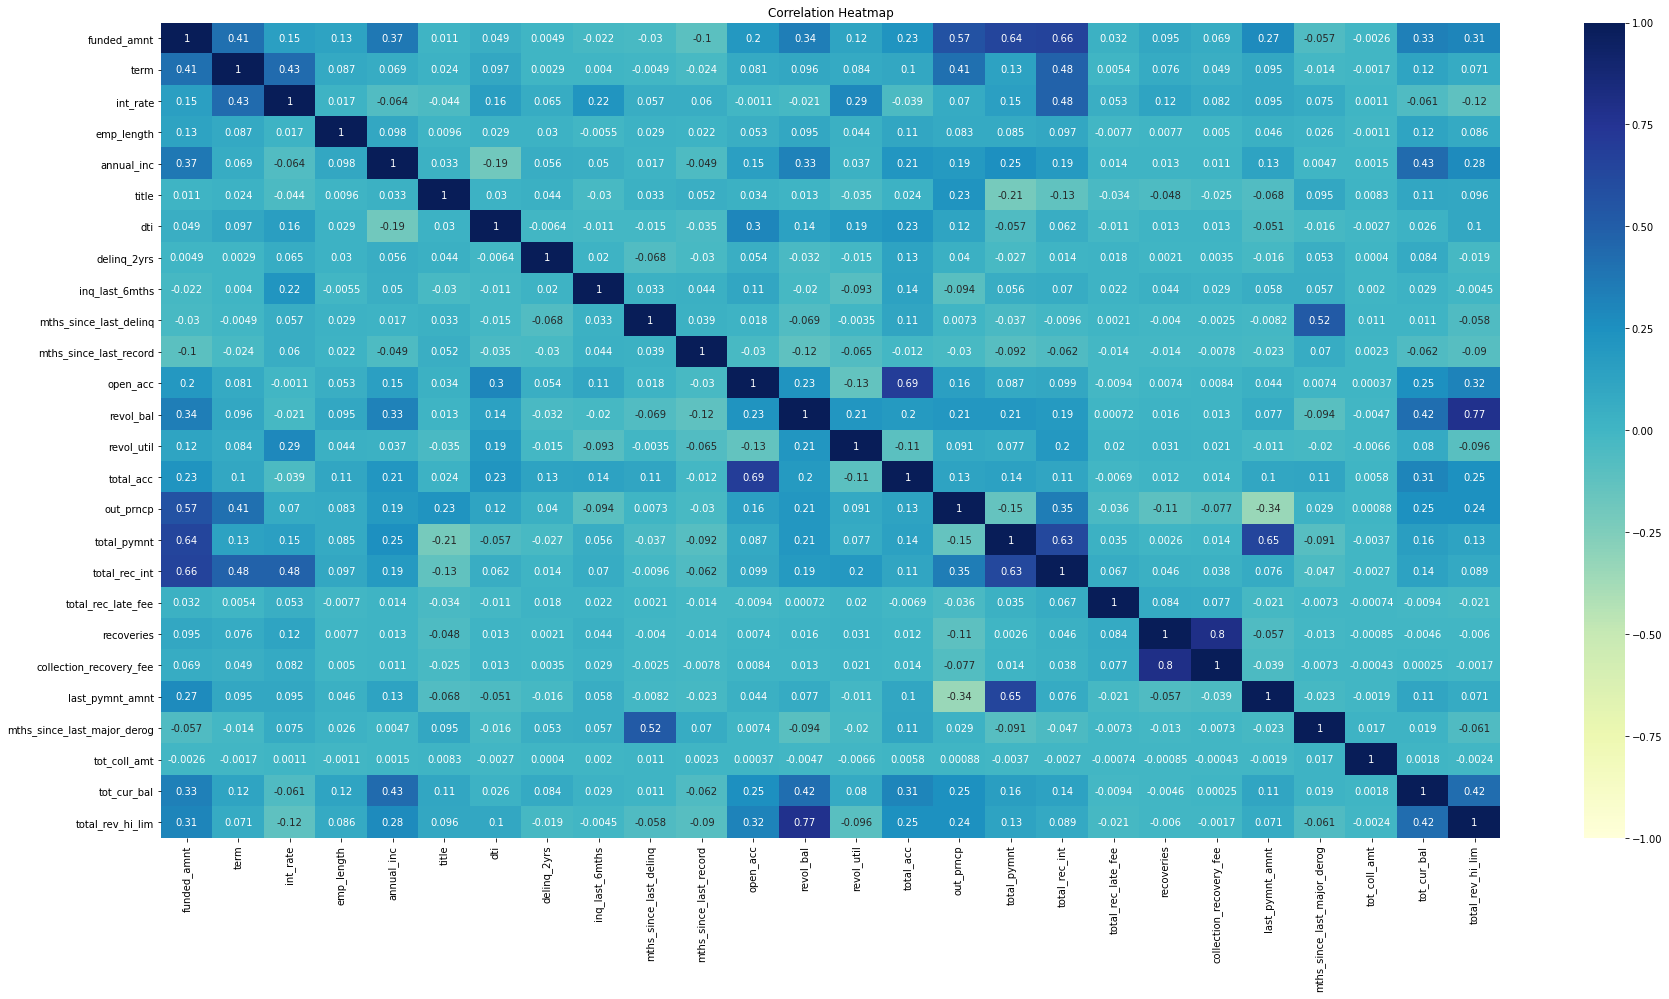

In [92]:
corr = m.corr()
mask = np.zeros_like(corr)
fit,ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
ax.set_ylim(len(corr), 0.0)
plt.title("Correlation Heatmap")
plt.show()

In [93]:
new_train=train_d.copy()
new_test=test_d.copy()
print(new_train.shape)
print(new_test.shape)

(598978, 48)
(256991, 48)


In [94]:
#deleting coloumns which shows Multicollinearity
new_train.drop(["loan_amnt","funded_amnt_inv","installment","grade","sub_grade","out_prncp_inv","total_pymnt_inv","total_rec_prncp"],axis=1,inplace=True)
new_test.drop(["loan_amnt","funded_amnt_inv","installment","grade","sub_grade","out_prncp_inv","total_pymnt_inv","total_rec_prncp"],axis=1,inplace=True)

# data set 1 using under sampling

as we know our data set is imbalanced so we are using under sampling to balance it

In [95]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [96]:
x=new_train.drop(["default_ind","next_pymnt_d","issue_d","last_credit_pull_d","last_pymnt_d"],axis=1)
y=new_train["default_ind"]

In [97]:
x.shape

(598978, 35)

In [98]:
y.shape

(598978,)

In [99]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(
...     x, y, test_size=0.3, random_state=1)#splitting the data into training and testing

In [100]:
N=NearMiss()# creating  an instance 

In [101]:
resx,resy=N.fit_resample(Xt_train,yt_train)

In [102]:
print("orignal dataset shape {}".format(Counter(y)))

orignal dataset shape Counter({0: 552822, 1: 46156})


In [103]:
print("resampled dataset shape{}".format(Counter(resy)))

resampled dataset shapeCounter({0: 32257, 1: 32257})


In [104]:
d['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [105]:
new_train["default_ind"].value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [106]:
new_test["default_ind"].value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

# appliying feature selection tecniqe

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [108]:
best_features=SelectKBest(score_func=chi2,k=10)

In [109]:
fit=(best_features.fit(resx,resy))

In [110]:
d_scores_=pd.DataFrame(fit.scores_)
d_columns=pd.DataFrame(resx.columns)

In [111]:
feature_scores=pd.concat([d_columns,d_scores_],axis=1)
feature_scores.columns=["specs","scores"]

In [112]:
feature_scores

,specs,scores
0,member_id,1.973722e+11
1,funded_amnt,6.331577e+07
2,term,1.509758e+04
3,int_rate,1.610042e+04
4,emp_length,2.187530e+03
5,annual_inc,1.004359e+08
6,title,8.344959e+03
7,dti,1.109494e+04
8,delinq_2yrs,1.377502e+03
9,inq_last_6mths,1.245554e+03


In [113]:
print(feature_scores.nlargest(20,"scores"))

                          specs        scores
0                     member_id  1.973722e+11
25                  tot_cur_bal  2.505625e+09
26             total_rev_hi_lim  4.037206e+08
5                    annual_inc  1.004359e+08
1                   funded_amnt  6.331577e+07
13                    revol_bal  5.795845e+07
20                   recoveries  2.831754e+07
22              last_pymnt_amnt  2.056545e+07
17                  total_pymnt  1.445837e+07
18                total_rec_int  3.855880e+06
21      collection_recovery_fee  2.976646e+06
24                 tot_coll_amt  2.189540e+06
16                    out_prncp  2.441006e+05
23  mths_since_last_major_derog  1.104464e+05
19           total_rec_late_fee  3.931124e+04
11       mths_since_last_record  2.068334e+04
15                    total_acc  1.955449e+04
3                      int_rate  1.610042e+04
2                          term  1.509758e+04
14                   revol_util  1.430398e+04


In [114]:
new_x=pd.DataFrame(resx)
new_y=pd.DataFrame(resy)
new=new_x[["tot_cur_bal","total_rev_hi_lim","annual_inc","funded_amnt","revol_bal",  
          "recoveries","last_pymnt_amnt","total_pymnt","total_rec_int",
          "collection_recovery_fee","tot_coll_amt","out_prncp","total_rec_late_fee","mths_since_last_record", 
            "mths_since_last_major_derog","total_acc","int_rate","term","revol_util"]]
new=pd.concat([new,resy],axis=1)

In [115]:
new.head()

,tot_cur_bal,total_rev_hi_lim,annual_inc,funded_amnt,revol_bal,recoveries,last_pymnt_amnt,total_pymnt,total_rec_int,collection_recovery_fee,tot_coll_amt,out_prncp,total_rec_late_fee,mths_since_last_record,mths_since_last_major_derog,total_acc,int_rate,term,revol_util,default_ind
0,0.0,0.0,23004.0,1350.0,277.0,0.0,47.93,1567.087992,217.09,0.0,0.0,0.0,0.0,0.0,0.0,11.0,9.99,36,12.0,0
1,0.0,0.0,45000.0,2500.0,860.0,0.0,81.79,2814.980000,314.98,0.0,0.0,0.0,0.0,0.0,0.0,13.0,7.88,36,7.2,0
2,0.0,0.0,40084.8,3000.0,1233.0,0.0,73.58,3987.505108,987.51,0.0,0.0,0.0,0.0,0.0,0.0,33.0,11.86,60,39.8,0
3,0.0,0.0,25000.0,3000.0,452.0,0.0,98.93,3256.427442,256.43,0.0,0.0,0.0,0.0,0.0,0.0,20.0,5.42,36,5.4,0
4,0.0,0.0,45000.0,2500.0,4141.0,0.0,758.68,3137.084851,637.08,0.0,0.0,0.0,0.0,0.0,0.0,18.0,16.29,36,65.7,0


# creating model using logistic regression

In [243]:
lm1= LogisticRegression(solver='liblinear')
sc1=StandardScaler()

In [244]:
y1=new["default_ind"]
x1=new.drop(["default_ind"],axis=1)
print(x1.shape)
print(y1.shape)

(64514, 19)
(64514,)


In [245]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
...     x1, y1, test_size=0.3, random_state=1)#splitting the data into training and testing

In [246]:
X1_train = sc1.fit_transform(X1_train)
X1_test = sc1.transform (X1_test)

In [247]:
lm1.fit(X1_train,y1_train)

LogisticRegression(solver='liblinear')

In [248]:
predict1 = lm1.predict(X1_test)

In [249]:
confusion_matrix(y1_test,predict1)

array([[9773,   11],
       [ 221, 9350]], dtype=int64)

In [250]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y1_test,predict1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9784
           1       1.00      0.98      0.99      9571

    accuracy                           0.99     19355
   macro avg       0.99      0.99      0.99     19355
weighted avg       0.99      0.99      0.99     19355



as we are getting good accuracy on test data so now we are going to check on unseen data

In [251]:
test_d.shape

(256991, 48)

In [252]:
new_d=test_d[["tot_cur_bal","total_rev_hi_lim","annual_inc","funded_amnt","revol_bal",  
          "recoveries","last_pymnt_amnt","total_pymnt","total_rec_int",
          "collection_recovery_fee","tot_coll_amt","out_prncp","total_rec_late_fee","mths_since_last_record", 
            "mths_since_last_major_derog","total_acc","int_rate","term","revol_util","default_ind"]]

In [253]:
unseen_x1=new_d.drop(["default_ind"],axis=1)
unseen_y1=new_d["default_ind"]

In [254]:
unseen_x1= sc1.transform (unseen_x1)

In [255]:
unseen_predict1 = lm1.predict(unseen_x1)

In [256]:
confusion_matrix(unseen_y1,unseen_predict1)

array([[ 31859, 224821],
       [     5,    306]], dtype=int64)

In [257]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(unseen_y1,unseen_predict1))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.13    256991
   macro avg       0.50      0.55      0.11    256991
weighted avg       1.00      0.13      0.22    256991



# using knn

In [131]:
from sklearn.neighbors import KNeighborsClassifier

kmodel = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
kmodel.fit(X1_train,y1_train)

KNeighborsClassifier()

In [132]:
pred_k=kmodel.predict(X1_test)

In [133]:
confusion_matrix(y1_test,pred_k)

array([[9535,  249],
       [ 742, 8829]], dtype=int64)

In [134]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y1_test,pred_k))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9784
           1       0.97      0.92      0.95      9571

    accuracy                           0.95     19355
   macro avg       0.95      0.95      0.95     19355
weighted avg       0.95      0.95      0.95     19355



now we are going to check on test data

In [135]:
unseen_pre_k = kmodel.predict(unseen_x1)

In [136]:
confusion_matrix(unseen_y1,unseen_pre_k)

array([[ 40440, 216240],
       [     9,    302]], dtype=int64)

In [137]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(unseen_y1,unseen_pre_k ))

              precision    recall  f1-score   support

           0       1.00      0.16      0.27    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.16    256991
   macro avg       0.50      0.56      0.14    256991
weighted avg       1.00      0.16      0.27    256991



# using decision tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
clf1=DecisionTreeClassifier()

In [140]:
clf1.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [141]:
pred_d=clf1.predict(X1_test)

In [142]:
confusion_matrix(y1_test,pred_d)

array([[9621,  163],
       [ 139, 9432]], dtype=int64)

In [143]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y1_test,pred_d))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9784
           1       0.98      0.99      0.98      9571

    accuracy                           0.98     19355
   macro avg       0.98      0.98      0.98     19355
weighted avg       0.98      0.98      0.98     19355



In [144]:
unseen_pre_d = clf1.predict(unseen_x1)

In [145]:
confusion_matrix(unseen_y1,unseen_pre_d)

array([[ 20623, 236057],
       [     4,    307]], dtype=int64)

In [146]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(unseen_y1,unseen_pre_d ))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.08    256991
   macro avg       0.50      0.53      0.08    256991
weighted avg       1.00      0.08      0.15    256991



# using random forest

In [147]:
 from sklearn.ensemble import RandomForestClassifier

In [148]:
rm1=RandomForestClassifier()

In [149]:
rm1.fit(X1_train,y1_train)

RandomForestClassifier()

In [150]:
pred_rm1=rm1.predict(X1_test)

In [151]:
confusion_matrix(y1_test,pred_rm1)

array([[9747,   37],
       [ 151, 9420]], dtype=int64)

In [152]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y1_test,pred_rm1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9784
           1       1.00      0.98      0.99      9571

    accuracy                           0.99     19355
   macro avg       0.99      0.99      0.99     19355
weighted avg       0.99      0.99      0.99     19355



In [153]:
unseen_pre_rm1 = rm1.predict(unseen_x1)

In [154]:
confusion_matrix(unseen_y1,unseen_pre_rm1)

array([[  6379, 250301],
       [     3,    308]], dtype=int64)

In [155]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(unseen_y1,unseen_pre_rm1 ))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.03    256991
   macro avg       0.50      0.51      0.03    256991
weighted avg       1.00      0.03      0.05    256991



# using gradient boosting

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

In [157]:
gr1=GradientBoostingClassifier()

In [158]:
gr1.fit(X1_train,y1_train)

GradientBoostingClassifier()

In [159]:
pred_gr1=gr1.predict(X1_test)

In [160]:
confusion_matrix(y1_test,pred_gr1)

array([[9754,   30],
       [ 179, 9392]], dtype=int64)

In [161]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y1_test,pred_gr1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9784
           1       1.00      0.98      0.99      9571

    accuracy                           0.99     19355
   macro avg       0.99      0.99      0.99     19355
weighted avg       0.99      0.99      0.99     19355



In [162]:
unseen_pre_gr1 = gr1.predict(unseen_x1)

In [163]:
confusion_matrix(unseen_y1,unseen_pre_gr1)

array([[  7880, 248800],
       [     1,    310]], dtype=int64)

In [164]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(unseen_y1,unseen_pre_gr1 ))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.03    256991
   macro avg       0.50      0.51      0.03    256991
weighted avg       1.00      0.03      0.06    256991



# this time we are not using under sampling or over sampling 

In [165]:
new_train.shape

(598978, 40)

In [166]:
new_train.head()

,member_id,funded_amnt,term,int_rate,emp_length,annual_inc,issue_d,title,dti,delinq_2yrs,...,total_rev_hi_lim,default_ind,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w
0,86999,7500.0,36,13.75,0,22000.0,2007-06-01,0.0,14.29,1.0,...,0.0,0,0,0,0,1,0,0,0,0
1,90962,5000.0,36,7.43,8,150000.0,2007-07-01,0.0,0.00,0.0,...,0.0,0,1,0,0,0,0,0,0,0
2,98991,5750.0,36,7.43,10,125000.0,2007-07-01,0.0,0.27,0.0,...,0.0,0,1,0,0,0,0,0,0,0
3,112227,5000.0,36,7.43,6,40000.0,2007-07-01,0.0,2.55,0.0,...,0.0,0,0,0,0,0,1,0,0,0
4,109346,1200.0,36,11.54,0,20000.0,2007-07-01,0.0,2.04,0.0,...,0.0,0,0,0,0,0,1,0,0,0


In [167]:
x_train_d=new_train.drop(["default_ind","member_id","next_pymnt_d","issue_d","last_credit_pull_d","last_pymnt_d"],axis=1)
y_train_d=new_train["default_ind"]

In [168]:
x_train_d.shape

(598978, 34)

In [169]:
y_train_d.shape

(598978,)

In [170]:
best_features=SelectKBest(score_func=chi2,k=20)

In [171]:
fit=(best_features.fit(x_train_d,y_train_d))

In [172]:
d1_scores=pd.DataFrame(fit.scores_)
d1_columns=pd.DataFrame(x_train_d.columns)

In [173]:
feature_scores1=pd.concat([d1_columns,d1_scores],axis=1)
feature_scores1.columns=["specs","scores"]

In [174]:
feature_scores1

,specs,scores
0,funded_amnt,1.065240e+02
1,term,3.469622e+03
2,int_rate,2.308768e+04
3,emp_length,5.588979e+02
4,annual_inc,5.345075e+07
5,title,4.836328e+03
6,dti,1.779780e+03
7,delinq_2yrs,6.316727e+01
8,inq_last_6mths,4.279329e+03
9,mths_since_last_delinq,2.262890e+03


In [175]:
print(feature_scores1.nlargest(20,"scores"))

                          specs        scores
19                   recoveries  4.824538e+08
24                  tot_cur_bal  4.644922e+08
15                    out_prncp  2.694688e+08
21              last_pymnt_amnt  9.892894e+07
25             total_rev_hi_lim  8.783879e+07
16                  total_pymnt  6.709542e+07
4                    annual_inc  5.345075e+07
20      collection_recovery_fee  5.076075e+07
12                    revol_bal  6.949852e+06
23                 tot_coll_amt  1.786553e+06
18           total_rec_late_fee  4.614676e+05
17                total_rec_int  2.496253e+05
2                      int_rate  2.308768e+04
22  mths_since_last_major_derog  1.429917e+04
13                   revol_util  1.176660e+04
5                         title  4.836328e+03
8                inq_last_6mths  4.279329e+03
1                          term  3.469622e+03
9        mths_since_last_delinq  2.262890e+03
14                    total_acc  2.002652e+03


In [176]:
x1_train_d=new_train[["recoveries","tot_cur_bal","out_prncp","last_pymnt_amnt","total_rev_hi_lim",  
                   "total_pymnt","annual_inc","collection_recovery_fee","revol_bal","tot_coll_amt", 
                    "total_rec_late_fee","total_rec_int","int_rate",  
                     "mths_since_last_major_derog","revol_util","inq_last_6mths","term","mths_since_last_delinq","total_acc"]]

# logistic regression

In [258]:
lm2= LogisticRegression(solver='liblinear')
sc2=StandardScaler()

In [259]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
...     x1_train_d,y_train_d,test_size=0.3, random_state=1)#splitting the data into training and testing

In [260]:
X2_train = sc2.fit_transform(X2_train)
X2_test = sc2.transform (X2_test)

In [261]:
lm2.fit(X2_train,y2_train)

LogisticRegression(solver='liblinear')

In [262]:
predict2 = lm2.predict(X2_test)

In [263]:
confusion_matrix(y2_test,predict2)

array([[165546,    249],
       [  3515,  10384]], dtype=int64)

In [264]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y2_test,predict2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    165795
           1       0.98      0.75      0.85     13899

    accuracy                           0.98    179694
   macro avg       0.98      0.87      0.92    179694
weighted avg       0.98      0.98      0.98    179694



In [265]:
test_d.shape

(256991, 48)

In [266]:
test_d.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rev_hi_lim,default_ind,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w
0,55457247,35000.0,35000.0,35000.0,36,9.17,1115.77,6,29,1,...,70500.0,0,1,0,0,0,0,0,1,1
1,55086031,11500.0,11500.0,11475.0,60,9.17,239.68,6,29,10,...,33500.0,0,0,0,0,0,1,1,0,1
2,55287617,12000.0,12000.0,12000.0,60,15.61,289.34,4,20,2,...,20400.0,0,0,0,0,0,1,1,0,1
3,55396770,35000.0,35000.0,35000.0,36,12.29,1167.36,5,25,3,...,36400.0,0,1,0,0,0,0,0,1,1
4,53224173,27000.0,27000.0,27000.0,60,8.18,549.80,6,30,10,...,46700.0,0,1,0,0,0,0,1,0,1


In [267]:
ynew_unseen=new_test["default_ind"]
xnew_unseen=new_test[["recoveries","tot_cur_bal","out_prncp","last_pymnt_amnt","total_rev_hi_lim",  
                   "total_pymnt","annual_inc","collection_recovery_fee","revol_bal","tot_coll_amt", 
                    "total_rec_late_fee","total_rec_int","int_rate",  
                     "mths_since_last_major_derog","revol_util","inq_last_6mths","term","mths_since_last_delinq","total_acc"]]

In [268]:
predict_new_unseen = lm2.predict(xnew_unseen)

In [269]:
confusion_matrix(ynew_unseen,predict_new_unseen)

array([[245943,  10737],
       [    64,    247]], dtype=int64)

In [270]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ynew_unseen,predict_new_unseen))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    256680
           1       0.02      0.79      0.04       311

    accuracy                           0.96    256991
   macro avg       0.51      0.88      0.51    256991
weighted avg       1.00      0.96      0.98    256991



# using decision tree

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
clf=DecisionTreeClassifier()

In [192]:
clf.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [193]:
predict_d = clf.predict(X2_test)

In [194]:
confusion_matrix(y2_test,predict_d)

array([[165070,    725],
       [   667,  13232]], dtype=int64)

In [195]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y2_test,predict_d))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165795
           1       0.95      0.95      0.95     13899

    accuracy                           0.99    179694
   macro avg       0.97      0.97      0.97    179694
weighted avg       0.99      0.99      0.99    179694



In [196]:
predict_d= clf.predict(xnew_unseen)

In [197]:
confusion_matrix(ynew_unseen,predict_d)

array([[     0, 256680],
       [     0,    311]], dtype=int64)

In [198]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ynew_unseen,predict_d))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.00    256991
   macro avg       0.00      0.50      0.00    256991
weighted avg       0.00      0.00      0.00    256991



c:\users\tyagi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\tyagi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\tyagi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [199]:
new_train.head()

,member_id,funded_amnt,term,int_rate,emp_length,annual_inc,issue_d,title,dti,delinq_2yrs,...,total_rev_hi_lim,default_ind,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w
0,86999,7500.0,36,13.75,0,22000.0,2007-06-01,0.0,14.29,1.0,...,0.0,0,0,0,0,1,0,0,0,0
1,90962,5000.0,36,7.43,8,150000.0,2007-07-01,0.0,0.00,0.0,...,0.0,0,1,0,0,0,0,0,0,0
2,98991,5750.0,36,7.43,10,125000.0,2007-07-01,0.0,0.27,0.0,...,0.0,0,1,0,0,0,0,0,0,0
3,112227,5000.0,36,7.43,6,40000.0,2007-07-01,0.0,2.55,0.0,...,0.0,0,0,0,0,0,1,0,0,0
4,109346,1200.0,36,11.54,0,20000.0,2007-07-01,0.0,2.04,0.0,...,0.0,0,0,0,0,0,1,0,0,0


In [200]:
new_test.shape

(256991, 40)

In [201]:
sc3=StandardScaler()

In [202]:
xt=new_train.drop(["default_ind","member_id","next_pymnt_d","issue_d","last_credit_pull_d","last_pymnt_d"],axis=1)
yt=new_train["default_ind"]

In [203]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
...     xt,yt,test_size=0.3, random_state=1)#splitting the data into training and testing

In [204]:
X3_train = sc3.fit_transform(X3_train)
X3_test = sc3.transform (X3_test)

In [205]:
clf2=DecisionTreeClassifier()

In [206]:
clf2.fit(X3_train,y3_train)

DecisionTreeClassifier()

In [207]:
predict_d1 = clf2.predict(X3_test)

In [208]:
confusion_matrix(y3_test,predict_d1)

array([[165257,    538],
       [   469,  13430]], dtype=int64)

In [209]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y3_test,predict_d1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165795
           1       0.96      0.97      0.96     13899

    accuracy                           0.99    179694
   macro avg       0.98      0.98      0.98    179694
weighted avg       0.99      0.99      0.99    179694



In [210]:
xt_unseen=new_test.drop(["default_ind","member_id","next_pymnt_d","issue_d","last_credit_pull_d","last_pymnt_d"],axis=1)
yt_unseen=new_test["default_ind"]

In [211]:

xt_unseen = sc3.transform (xt_unseen)

In [212]:
predict_d1_unseen=clf2.predict(xt_unseen)

In [213]:
confusion_matrix(yt_unseen,predict_d1_unseen)

array([[109265, 147415],
       [     7,    304]], dtype=int64)

In [214]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(yt_unseen,predict_d1_unseen))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.43    256991
   macro avg       0.50      0.70      0.30    256991
weighted avg       1.00      0.43      0.60    256991



# USING Gradient boosting

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

In [216]:
gr=GradientBoostingClassifier()

In [217]:
gr.fit(X3_train,y3_train)

GradientBoostingClassifier()

In [218]:
predict_gr = gr.predict(X3_test)

In [219]:
confusion_matrix(y3_test,predict_gr)

array([[165775,     20],
       [   937,  12962]], dtype=int64)

In [220]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y3_test,predict_gr))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    165795
           1       1.00      0.93      0.96     13899

    accuracy                           0.99    179694
   macro avg       1.00      0.97      0.98    179694
weighted avg       0.99      0.99      0.99    179694



In [221]:
predict_gr_unseen=gr.predict(xt_unseen)

In [222]:
confusion_matrix(yt_unseen,predict_gr_unseen)

array([[130153, 126527],
       [     8,    303]], dtype=int64)

In [223]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(yt_unseen,predict_gr_unseen))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67    256680
           1       0.00      0.97      0.00       311

    accuracy                           0.51    256991
   macro avg       0.50      0.74      0.34    256991
weighted avg       1.00      0.51      0.67    256991



# using random forest

In [224]:
 from sklearn.ensemble import RandomForestClassifier

In [225]:
rm=RandomForestClassifier()

In [226]:
rm.fit(X3_train,y3_train)

RandomForestClassifier()

In [227]:
predict_rm = rm.predict(X3_test)

In [228]:
confusion_matrix(y3_test,predict_rm)

array([[165795,      0],
       [   888,  13011]], dtype=int64)

In [229]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y3_test,predict_rm))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    165795
           1       1.00      0.94      0.97     13899

    accuracy                           1.00    179694
   macro avg       1.00      0.97      0.98    179694
weighted avg       1.00      1.00      0.99    179694



In [230]:
predict_rm_unseen=rm.predict(xt_unseen)

In [231]:
confusion_matrix(yt_unseen,predict_rm_unseen)

array([[172742,  83938],
       [     8,    303]], dtype=int64)

In [232]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(yt_unseen,predict_rm_unseen))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80    256680
           1       0.00      0.97      0.01       311

    accuracy                           0.67    256991
   macro avg       0.50      0.82      0.41    256991
weighted avg       1.00      0.67      0.80    256991



# using knn

In [251]:
kmodel1 = KNeighborsClassifier(n_neighbors=5)

In [252]:
kmodel1.fit(X3_train,y3_train)

KNeighborsClassifier()

In [253]:
predict_k = kmodel1.predict(X3_test)

KeyboardInterrupt: 

In [ ]:
confusion_matrix(y3_test,predict_k)

In [ ]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(y3_test,predict_k))

In [ ]:
predict_km_unseen=kmodel1.predict(xt_unseen)

In [ ]:
confusion_matrix(yt_unseen,predict_km_unseen)

In [ ]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(yt_unseen,predict_km_unseen))

# using over sampling 

In [233]:
from imblearn.over_sampling import RandomOverSampler

# using synthetic samples

In [271]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
ys = new_train["default_ind"]
Xs = new_train.drop(["default_ind","member_id","next_pymnt_d","issue_d","last_credit_pull_d","last_pymnt_d"], axis=1)

# setting up testing and training sets
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
Xs_train, ys_train = sm.fit_sample(Xs_train, ys_train)

In [353]:
Xs_train.shape

(829290, 34)

In [354]:
ys_train.shape

(829290,)

In [272]:
#scaler = StandardScaler()

In [273]:
#Xs_train = scaler.fit_transform(Xs_train)
#Xs_test = scaler.transform (Xs_test)

In [274]:
log12 = LogisticRegression(solver='liblinear')
log12.fit(Xs_train, ys_train)

smote_pred = log12.predict(Xs_test)


In [275]:
confusion_matrix(ys_test,smote_pred )

array([[138071,    106],
       [   398,  11170]], dtype=int64)

In [276]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ys_test,smote_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138177
           1       0.99      0.97      0.98     11568

    accuracy                           1.00    149745
   macro avg       0.99      0.98      0.99    149745
weighted avg       1.00      1.00      1.00    149745



In [277]:
ys_unseen = new_test["default_ind"]
Xs_unseen = new_test.drop(["default_ind","member_id","next_pymnt_d","issue_d","last_credit_pull_d","last_pymnt_d"], axis=1)


In [278]:
#Xs_unseen = scaler.transform (Xs_unseen)

In [280]:

smote_pred_unseen = log12.predict(Xs_unseen)

In [281]:
confusion_matrix(ys_unseen,smote_pred_unseen )

array([[256565,    115],
       [    63,    248]], dtype=int64)

In [282]:
#this is best result till now
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ys_unseen,smote_pred_unseen ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.80      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



# using random forest with synthetic samples

In [283]:
rm1=RandomForestClassifier()
smote1 = rm1.fit(Xs_train, ys_train)
smote_pred_rm1 = smote1.predict(Xs_test)


In [284]:
confusion_matrix(ys_test,smote_pred_rm1 )

array([[138164,     13],
       [   720,  10848]], dtype=int64)

In [285]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ys_test,smote_pred_rm1 ))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    138177
           1       1.00      0.94      0.97     11568

    accuracy                           1.00    149745
   macro avg       1.00      0.97      0.98    149745
weighted avg       1.00      1.00      1.00    149745



In [286]:
smote_pred_unseen_rm1 = smote1.predict(Xs_unseen)

In [287]:
confusion_matrix(ys_unseen,smote_pred_unseen_rm1)

array([[242072,  14608],
       [    43,    268]], dtype=int64)

In [288]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ys_unseen,smote_pred_unseen_rm1))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    256680
           1       0.02      0.86      0.04       311

    accuracy                           0.94    256991
   macro avg       0.51      0.90      0.50    256991
weighted avg       1.00      0.94      0.97    256991



# decision tree

In [289]:
clf4=DecisionTreeClassifier()

In [290]:
clf4.fit(Xs_train, ys_train)
smote_pred_d = clf4.predict(Xs_test)

In [291]:
confusion_matrix(ys_test,smote_pred_d )

array([[137479,    698],
       [   350,  11218]], dtype=int64)

In [292]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ys_test,smote_pred_d))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    138177
           1       0.94      0.97      0.96     11568

    accuracy                           0.99    149745
   macro avg       0.97      0.98      0.98    149745
weighted avg       0.99      0.99      0.99    149745



In [293]:
smote_pred_unseen_d =clf4.predict(Xs_unseen)

In [294]:
confusion_matrix(ys_unseen,smote_pred_unseen_d)

array([[133852, 122828],
       [    11,    300]], dtype=int64)

In [295]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ys_unseen,smote_pred_unseen_d))

              precision    recall  f1-score   support

           0       1.00      0.52      0.69    256680
           1       0.00      0.96      0.00       311

    accuracy                           0.52    256991
   macro avg       0.50      0.74      0.35    256991
weighted avg       1.00      0.52      0.68    256991



# using feature selection tech on oversampled data

In [296]:
best_features1=SelectKBest(score_func=chi2,k=20)

In [297]:
fit=(best_features1.fit(Xs_train,ys_train))

In [298]:
d1_scores1=pd.DataFrame(fit.scores_)
d1_columns1=pd.DataFrame(x_train_d.columns)

In [299]:
feature_scores12=pd.concat([d1_columns1,d1_scores1],axis=1)
feature_scores12.columns=["specs","scores"]

In [300]:
feature_scores12

,specs,scores
0,funded_amnt,1.382309e+04
1,term,1.366850e+04
2,int_rate,1.020915e+05
3,emp_length,1.643074e+04
4,annual_inc,2.839252e+08
5,title,2.809037e+04
6,dti,8.259765e+03
7,delinq_2yrs,4.276257e+02
8,inq_last_6mths,1.795535e+04
9,mths_since_last_delinq,1.007227e+04


In [301]:
print(feature_scores12.nlargest(20,"scores"))

                                  specs        scores
24                          tot_cur_bal  2.593244e+09
15                            out_prncp  2.397564e+09
21                      last_pymnt_amnt  7.906842e+08
25                     total_rev_hi_lim  5.148003e+08
16                          total_pymnt  4.068598e+08
19                           recoveries  3.552417e+08
4                            annual_inc  2.839252e+08
12                            revol_bal  3.919469e+07
20              collection_recovery_fee  3.602930e+07
23                         tot_coll_amt  1.993349e+07
17                        total_rec_int  1.436889e+06
18                   total_rec_late_fee  7.100786e+05
2                              int_rate  1.020915e+05
22          mths_since_last_major_derog  7.489821e+04
13                           revol_util  6.939422e+04
33                initial_list_status_w  6.750955e+04
31  verification_status_Source Verified  4.895212e+04
5                           

In [338]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
ys1 = new_train["default_ind"]
Xs1 = new_train[["recoveries","tot_cur_bal","out_prncp","last_pymnt_amnt","total_rev_hi_lim",  
                   "total_pymnt","annual_inc","collection_recovery_fee","revol_bal","tot_coll_amt", 
                    "total_rec_late_fee","total_rec_int","int_rate",  
                     "mths_since_last_major_derog","revol_util","inq_last_6mths","term","mths_since_last_delinq","total_acc"]]

# setting up testing and training sets
Xs1_train, Xs1_test, ys1_train, ys1_test = train_test_split(Xs1, ys1, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
Xs1_train, ys1_train = sm.fit_sample(Xs1_train, ys1_train)

In [339]:
#scaler1 = StandardScaler()

In [340]:
#Xs1_train = scaler1.fit_transform(Xs1_train)
#Xs1_test = scaler1.transform (Xs1_test)

In [341]:
log13 = LogisticRegression(solver='liblinear')
log13.fit(Xs1_train, ys1_train)

smote_pred13 = log13.predict(Xs1_test)


c:\users\tyagi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [342]:
confusion_matrix(ys1_test,smote_pred13 )

array([[132662,   5515],
       [   775,  10793]], dtype=int64)

In [343]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ys1_test,smote_pred13))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    138177
           1       0.66      0.93      0.77     11568

    accuracy                           0.96    149745
   macro avg       0.83      0.95      0.88    149745
weighted avg       0.97      0.96      0.96    149745



In [344]:
ys_unseen1 = new_test["default_ind"]
Xs_unseen1 = new_test[["recoveries","tot_cur_bal","out_prncp","last_pymnt_amnt","total_rev_hi_lim",  
                   "total_pymnt","annual_inc","collection_recovery_fee","revol_bal","tot_coll_amt", 
                    "total_rec_late_fee","total_rec_int","int_rate",  
                     "mths_since_last_major_derog","revol_util","inq_last_6mths","term","mths_since_last_delinq","total_acc"]]


In [345]:
#Xs_unseen1 = scaler1.transform (Xs_unseen1)

In [346]:
smote_pred_unseen1 = log13.predict(Xs_unseen1)

In [347]:
confusion_matrix(ys_unseen1,smote_pred_unseen1 )

array([[252428,   4252],
       [    62,    249]], dtype=int64)

In [348]:
#this is best result till now
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(classification_report(ys_unseen1,smote_pred_unseen1 ))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.06      0.80      0.10       311

    accuracy                           0.98    256991
   macro avg       0.53      0.89      0.55    256991
weighted avg       1.00      0.98      0.99    256991



In [352]:
Xs.shape

(598978, 34)